In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 前処理

In [128]:
#データ読み込み
df = pd.read_csv("./data/train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [129]:
#欠損値の削除
df = df.dropna()
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [130]:
#欠損値有無の確認

is_null = df.isnull()
null_counts = is_null.sum()
null_counts

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [131]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query(' Class == "Plus"')

In [132]:
#id,unnamed,class,satisfaction 不要な列を消す
#ecoクラスのsatisfaction　は残す

df_Busi_del = df_Busi.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','Unnamed: 0','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)

In [133]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [134]:
'''
Gender_Male　　0=男性,1=女性
'''

df_Eco_enc

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
5,26,1180,3,4,2,1,1,2,1,1,...,4,4,4,1,0,0.0,0,0,1,0
6,47,1276,2,4,2,3,2,2,2,2,...,4,3,5,2,9,23.0,1,0,1,0
9,20,1061,3,3,3,4,2,3,3,2,...,4,4,3,2,0,0.0,1,1,0,0
10,24,1182,4,5,5,4,2,5,2,2,...,5,3,5,2,0,0.0,0,1,0,0
12,53,834,1,4,4,4,1,1,1,1,...,3,4,4,1,28,8.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103895,24,1055,1,1,1,2,1,1,1,1,...,5,5,4,1,13,10.0,0,1,0,0
103896,57,867,4,5,5,5,4,4,4,4,...,3,1,3,4,0,0.0,1,0,0,0
103898,50,1620,3,1,3,4,2,3,2,2,...,4,2,4,2,0,0.0,1,0,1,0
103899,23,192,2,1,2,3,2,2,2,2,...,4,2,3,2,3,0.0,0,1,0,0


## Ecoクラス分析

### 次元削減とクラスタリング

In [136]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN

In [137]:
df_Eco_enc = df_Eco_enc.reset_index(drop=True)
Eco_enc_df = df_Eco_enc

In [138]:
Eco_enc_df.shape

(46593, 22)

In [139]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'satisfaction_satisfied'],
      dtype='object')

In [140]:
Eco_enc_df.info()

'''
0   Age                                年齢
1   Flight Distance                    飛行距離
2   Inflight wifi service              機内wifiサービス
3   Departure/Arrival time convenient  出発・到着時間の利便性
4   Ease of Online booking             オンライン予約のしやすさ
5   Gate location                      ゲートの位置
6   Food and drink                     飲食
7   Online boarding                    オンライン搭乗
8   Seat comfort                       シートの快適性
9   Inflight entertainment             機内エンターテインメント
10  On-board service                    機内サービス
11  Leg room service                    レッグルームサービス
12  Baggage handling                    手荷物取扱い
13  Checkin service                     チェックイン・サービス
14  Inflight service                    機内サービス
15  Cleanliness                         清潔さ
16  Departure Delay in Minutes          出発の遅れ（分）
17  Arrival Delay in Minutes            到着遅延（分）
18  Gender_Male                         性別_男性
19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客
20  Type of Travel_Personal Travel      旅行タイプ_個人旅行
21  satisfaction_satisfied              満足度_満足

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46593 entries, 0 to 46592
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                46593 non-null  int64  
 1   Flight Distance                    46593 non-null  int64  
 2   Inflight wifi service              46593 non-null  int64  
 3   Departure/Arrival time convenient  46593 non-null  int64  
 4   Ease of Online booking             46593 non-null  int64  
 5   Gate location                      46593 non-null  int64  
 6   Food and drink                     46593 non-null  int64  
 7   Online boarding                    46593 non-null  int64  
 8   Seat comfort                       46593 non-null  int64  
 9   Inflight entertainment             46593 non-null  int64  
 10  On-board service                   46593 non-null  int64  
 11  Leg room service                   46593 non-null  int

'\n0   Age                                年齢\n1   Flight Distance                    飛行距離\n2   Inflight wifi service              機内wifiサービス\n3   Departure/Arrival time convenient  出発・到着時間の利便性\n4   Ease of Online booking             オンライン予約のしやすさ\n5   Gate location                      ゲートの位置\n6   Food and drink                     飲食\n7   Online boarding                    オンライン搭乗\n8   Seat comfort                       シートの快適性\n9   Inflight entertainment             機内エンターテインメント\n10  On-board service                    機内サービス\n11  Leg room service                    レッグルームサービス\n12  Baggage handling                    手荷物取扱い\n13  Checkin service                     チェックイン・サービス\n14  Inflight service                    機内サービス\n15  Cleanliness                         清潔さ\n16  Departure Delay in Minutes          出発の遅れ（分）\n17  Arrival Delay in Minutes            到着遅延（分）\n18  Gender_Male                         性別_男性\n19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客\n20  Type of Travel_P

In [141]:
#T-sneで次元削減
tsne = TSNE(n_components=2)
eco_tsne = tsne.fit_transform(Eco_enc_df)

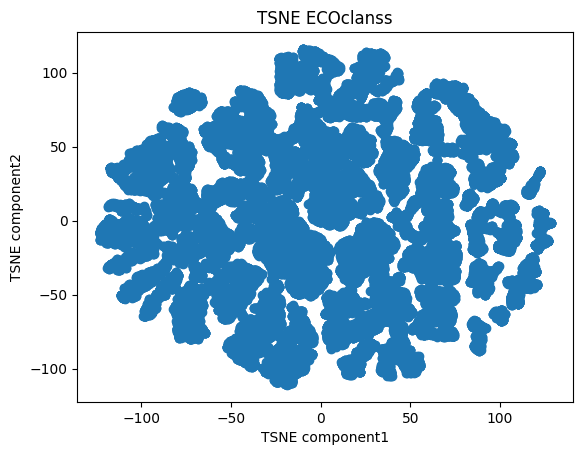

In [142]:
plt.scatter(eco_tsne[:,0],eco_tsne[:,1])
plt.xlabel('TSNE component1')
plt.ylabel('TSNE component2')
plt.title('TSNE ECOclanss')
plt.show()

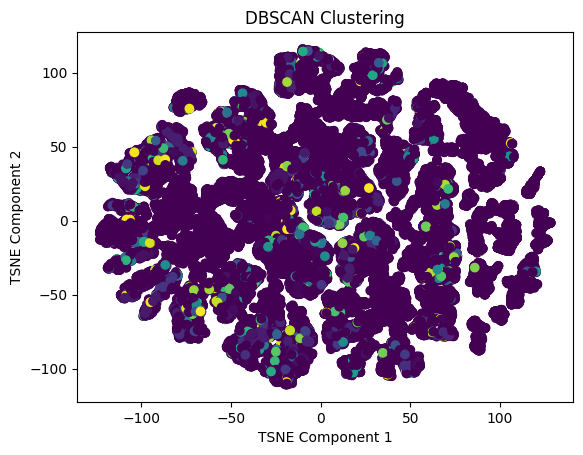

In [143]:
# DBSCANによるクラスタリング
dbscan = DBSCAN(eps = 5,min_samples= 3).fit(eco_tsne)
labels = dbscan.fit_predict(Eco_enc_df)

# グラフ化
plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=labels)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('DBSCAN Clustering')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


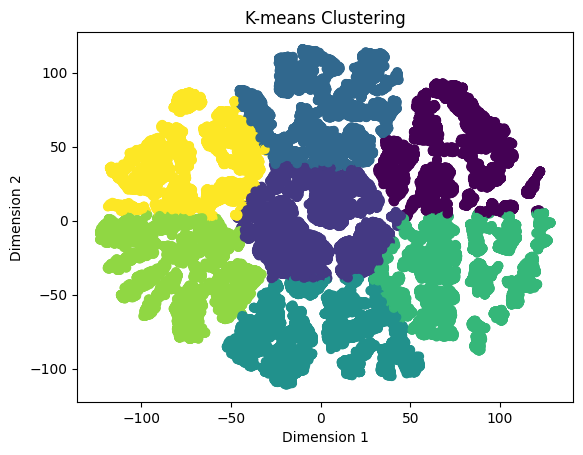

In [144]:
kmeans = KMeans(n_clusters=7, max_iter = 300)
eco_kmeans = kmeans.fit_predict(eco_tsne)

plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
plt.title('K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

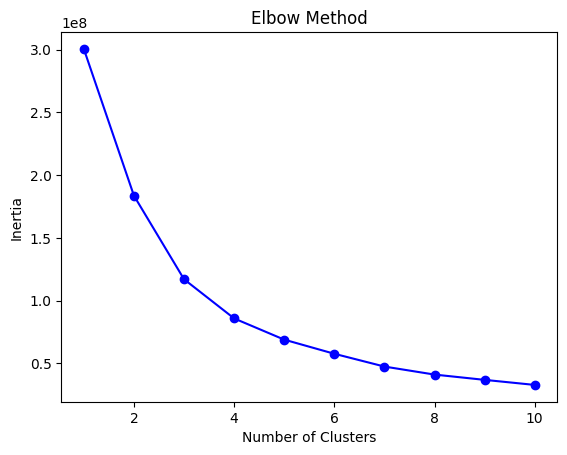

In [145]:
inertia = []
k_values = range(1, 11)  # クラスタ数の範囲を設定

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(eco_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [149]:
# クラスタリング結果を元のデータフレームに追加
Eco_enc_df['Cluster'] = eco_kmeans

'''
# クラスタリング結果のラベリング
labels = [0,1,2,3,4,5,6]
Eco_enc_df['Cluster Label'] = [labels[label] for label in eco_kmeans]
'''
#Eco_enc_df = Eco_enc_df.drop('Cluster Label', axis=1)



"\n# クラスタリング結果のラベリング\nlabels = [0,1,2,3,4,5,6]\nEco_enc_df['Cluster Label'] = [labels[label] for label in eco_kmeans]\n"

### クラスターの数値要約

In [150]:
Eco_enc_df.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
0,26,1180,3,4,2,1,1,2,1,1,...,4,4,1,0,0.0,0,0,1,0,0
1,47,1276,2,4,2,3,2,2,2,2,...,3,5,2,9,23.0,1,0,1,0,0


In [231]:
#クラスターごとにまとめた　　
'''どうやったらforでまとめられるんや？'''
cluster0_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 0]
cluster1_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 1]
cluster2_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 2]
cluster3_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 3]
cluster4_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 4]
cluster5_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 5]
cluster6_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 6]


In [ ]:
for i in range(6):
    cluster(i)_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == i]

In [232]:
cluster0_Eco_enc_df.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,...,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.0
mean,36.036021,1351.510740,2.661930,3.317085,2.632849,2.943159,3.073695,2.820555,3.118473,3.072538,...,3.166226,3.525777,3.105915,11.935228,12.023629,0.500826,0.234633,0.598149,0.172009,0.0
std,16.990632,451.373535,1.202399,1.418677,1.255639,1.163004,1.361894,1.255438,1.361101,1.373376,...,1.294687,1.184722,1.359099,28.956485,29.250556,0.500041,0.423804,0.490313,0.377420,0.0
min,7.000000,767.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,22.000000,1185.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,34.000000,1303.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
75%,50.000000,1514.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,11.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,73.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,358.000000,369.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [233]:
cluster1_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.00000,...,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.0
mean,34.353484,572.627039,2.663716,3.154673,2.655116,2.976982,3.095991,2.808018,3.093335,3.09030,...,3.149108,3.477552,3.107626,8.396484,8.841786,0.490325,0.261793,0.546984,0.187808,1.0
std,15.583349,165.829406,1.218419,1.597804,1.260549,1.178364,1.358940,1.272636,1.367891,1.36012,...,1.304762,1.198424,1.352374,40.904558,40.950698,0.499938,0.439639,0.497819,0.390584,0.0
min,7.000000,362.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,22.000000,429.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,33.000000,563.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,46.000000,622.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,...,4.000000,4.000000,4.000000,5.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,80.000000,1598.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [234]:
cluster2_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,...,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.000000,6690.0
mean,37.660538,654.351868,2.649178,3.265620,2.627055,2.976981,3.058445,2.835277,3.115396,3.067115,...,3.109268,3.472347,3.071300,22.899701,23.641256,0.498954,0.241854,0.557698,0.165620,2.0
std,16.682951,81.364294,1.200091,1.481485,1.242379,1.178269,1.360119,1.275743,1.362797,1.365643,...,1.297394,1.198331,1.352118,42.415429,43.151187,0.500036,0.428238,0.496697,0.371767,0.0
min,7.000000,500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,24.000000,585.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,37.000000,669.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,2.0
75%,51.000000,721.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,28.000000,29.000000,1.000000,0.000000,1.000000,0.000000,2.0
max,80.000000,853.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,433.000000,455.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [235]:
cluster3_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,...,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.0
mean,38.987843,635.259600,2.675315,3.226390,2.662417,2.979689,3.095923,2.875167,3.160712,3.100815,...,3.146775,3.503484,3.103039,5.561898,5.926168,0.487176,0.218829,0.585322,0.190511,3.0
std,17.285591,295.203955,1.221407,1.510997,1.277852,1.188880,1.352853,1.292538,1.348948,1.357585,...,1.302013,1.183001,1.348596,11.210593,12.025485,0.499873,0.413483,0.492703,0.392734,0.0
min,7.000000,308.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,24.000000,349.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,38.000000,404.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.0
75%,54.000000,937.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,6.000000,7.000000,1.000000,0.000000,1.000000,0.000000,3.0
max,85.000000,1016.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,83.000000,115.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [236]:
cluster4_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,...,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.0
mean,37.209823,1504.197507,2.643587,3.330129,2.633073,2.978973,3.042205,2.846801,3.135626,3.056774,...,3.109342,3.418895,3.098078,19.353259,19.648543,0.471913,0.186092,0.629018,0.162812,4.0
std,17.240402,593.654767,1.190268,1.404855,1.248860,1.165774,1.355373,1.278644,1.354563,1.364287,...,1.296996,1.195901,1.354586,39.650931,39.769219,0.499248,0.389210,0.483104,0.369221,0.0
min,7.000000,825.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,23.000000,1041.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,36.000000,1113.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
75%,51.000000,2125.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,20.000000,21.000000,1.000000,0.000000,1.000000,0.000000,4.0
max,80.000000,2704.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,626.000000,604.000000,1.000000,1.000000,1.000000,1.000000,4.0


In [237]:
cluster4_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,...,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.0
mean,37.209823,1504.197507,2.643587,3.330129,2.633073,2.978973,3.042205,2.846801,3.135626,3.056774,...,3.109342,3.418895,3.098078,19.353259,19.648543,0.471913,0.186092,0.629018,0.162812,4.0
std,17.240402,593.654767,1.190268,1.404855,1.248860,1.165774,1.355373,1.278644,1.354563,1.364287,...,1.296996,1.195901,1.354586,39.650931,39.769219,0.499248,0.389210,0.483104,0.369221,0.0
min,7.000000,825.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,23.000000,1041.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
50%,36.000000,1113.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
75%,51.000000,2125.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,20.000000,21.000000,1.000000,0.000000,1.000000,0.000000,4.0
max,80.000000,2704.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,626.000000,604.000000,1.000000,1.000000,1.000000,1.000000,4.0


In [238]:
cluster5_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,...,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.000000,6677.0
mean,38.049723,250.277071,2.718586,3.107983,2.500973,2.964505,3.117118,2.729070,3.165194,3.128950,...,3.117718,3.476861,3.106036,12.109930,12.792721,0.490789,0.228546,0.545005,0.202786,5.0
std,16.472172,43.648124,1.242245,1.641980,1.414068,1.198823,1.366509,1.427438,1.368611,1.366924,...,1.289184,1.197140,1.354869,23.532092,24.088354,0.499953,0.419927,0.498008,0.402104,0.0
min,7.000000,174.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,24.000000,214.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
50%,37.000000,247.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.0
75%,51.000000,284.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,12.000000,14.000000,1.000000,0.000000,1.000000,0.000000,5.0
max,80.000000,416.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,146.000000,158.000000,1.000000,1.000000,1.000000,1.000000,5.0


In [239]:
cluster6_Eco_enc_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Cluster
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,...,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.0
mean,38.384891,265.297578,2.721351,2.984482,2.504775,2.982947,3.123124,2.771658,3.200887,3.181958,...,3.047067,3.369884,3.173943,27.998977,29.530355,0.488745,0.260573,0.501364,0.224079,6.0
std,16.693371,169.782943,1.260310,1.648944,1.394041,1.200680,1.380470,1.420186,1.361326,1.361670,...,1.322022,1.215675,1.362780,61.106699,62.777832,0.499916,0.438985,0.500041,0.417010,0.0
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,24.000000,121.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
50%,37.000000,163.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.0
75%,52.000000,472.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,26.000000,27.000000,1.000000,1.000000,1.000000,0.000000,6.0
max,85.000000,685.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,724.000000,705.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [ ]:
Eco_enc_df

### 色々なグラフ作成

#### クラスター別

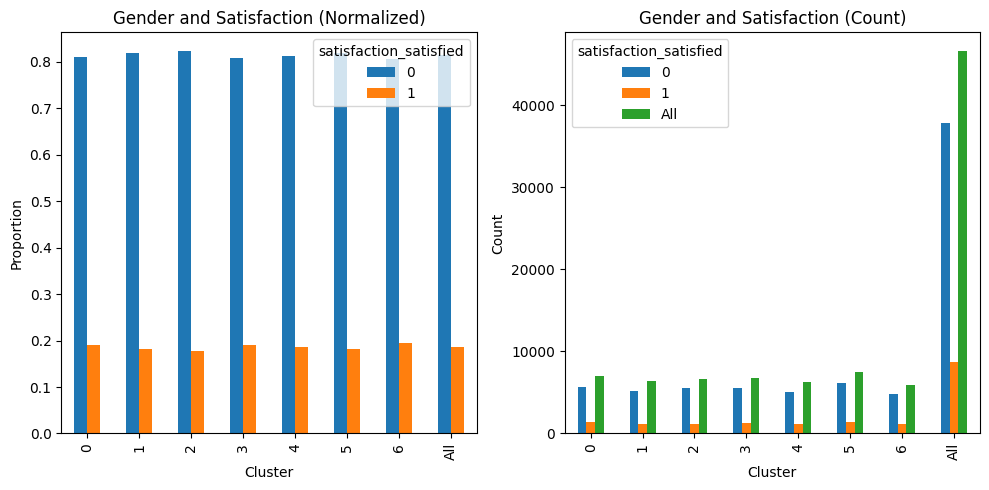

In [107]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [ ]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [108]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'satisfaction_satisfied', 'decade',
       'Cluster'],
      dtype='object')

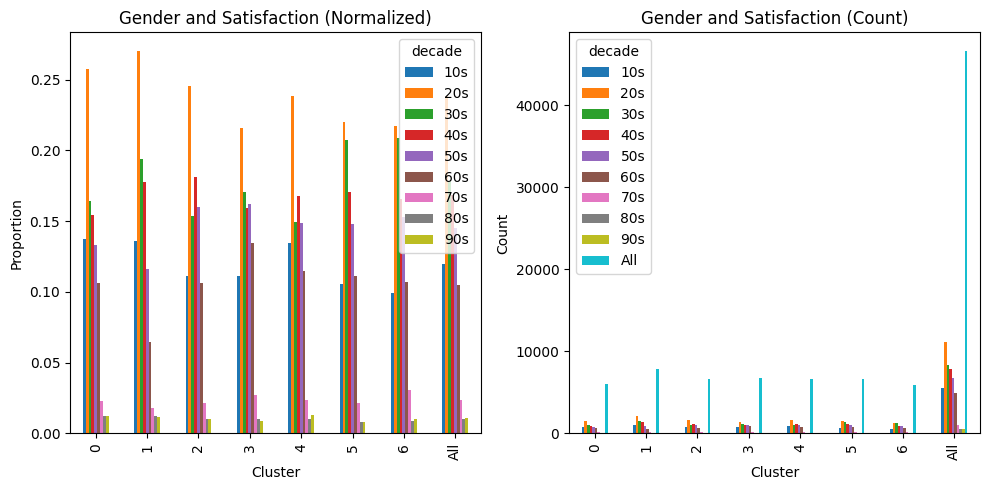

In [160]:
#クラスターごとの年齢の分布

# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


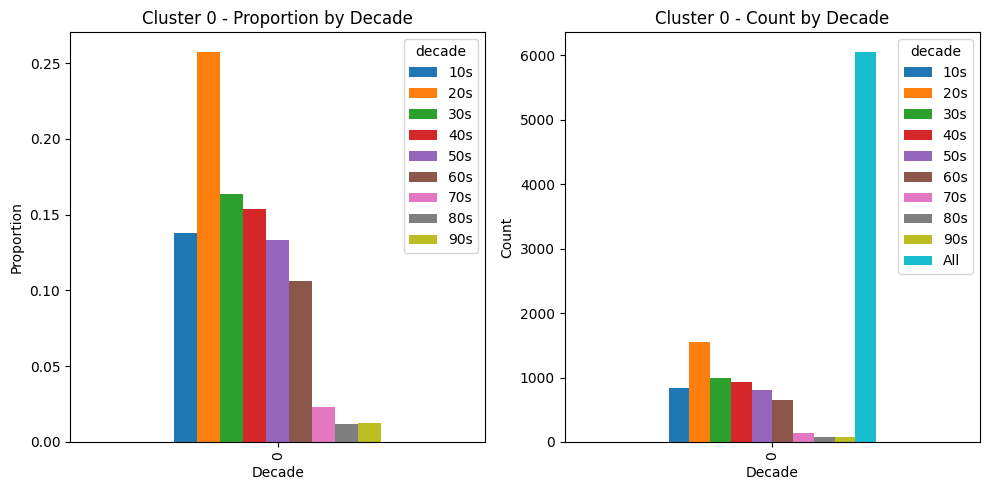

In [161]:
# クラスター0の情報のみ抽出
cluster_0_data = cross.loc[[0], :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cluster_0_data.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster 0 - Proportion by Decade')

# 右側のグラフ
cluster_0_counts = cross_counts.loc[[0], :]
cluster_0_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster 0 - Count by Decade')

plt.tight_layout()
plt.show()


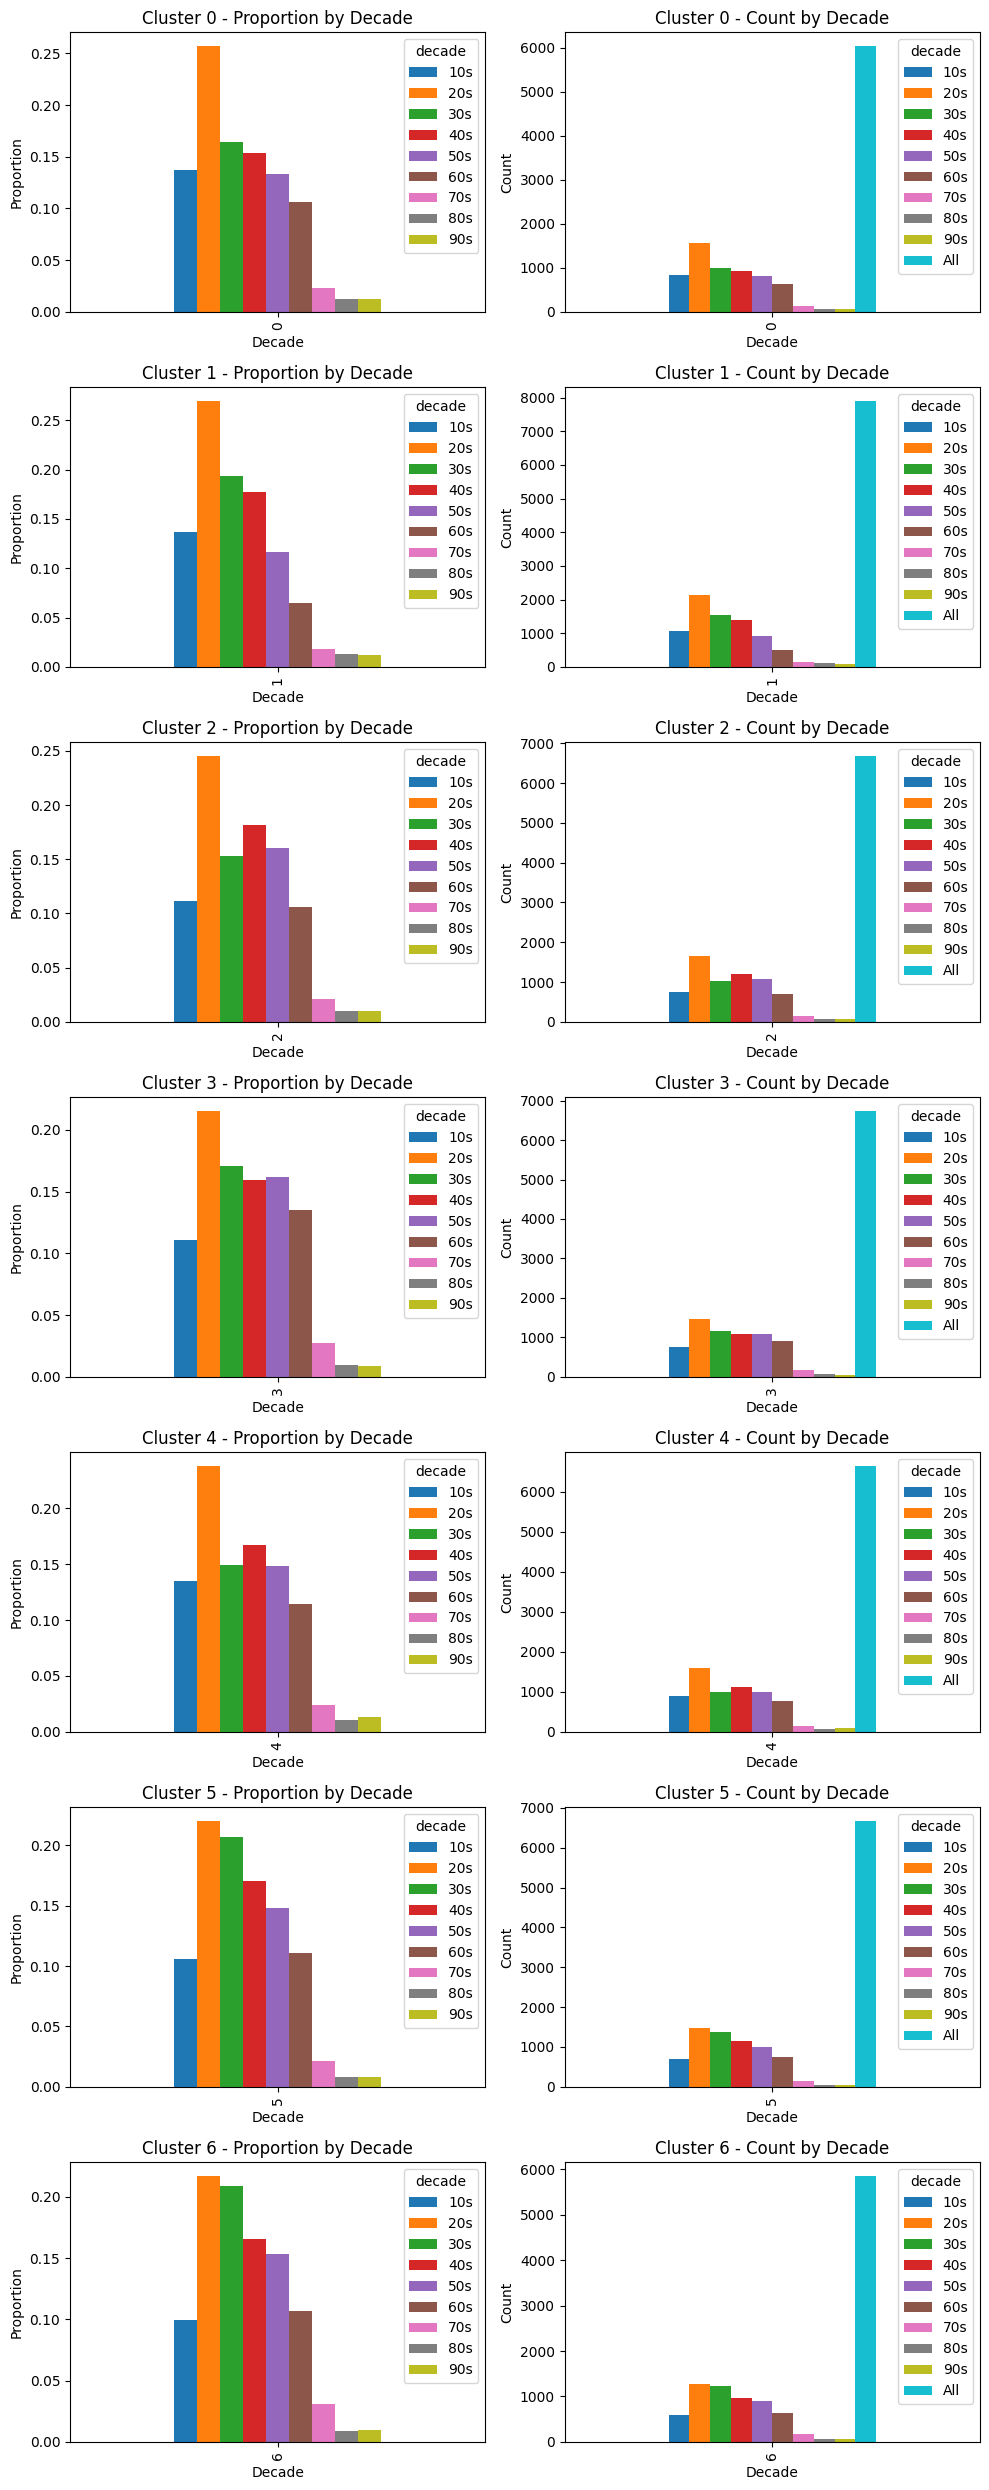

In [162]:
fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()

In [ ]:
features = [ 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'

/tmp/ipykernel_22/2516930569.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


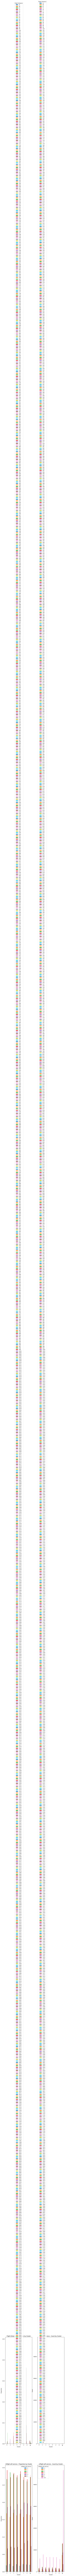

In [165]:
features = [ 'Flight Distance', 'Inflight wifi service',]

fig, axes = plt.subplots(len(features), 2, figsize=(10, 40))

for i, feature in enumerate(features):
    # クラスターごとの分布
    cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True, normalize="index")
    cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True)

    # 左側のグラフ
    cross.plot(kind="bar", ax=axes[i, 0])
    axes[i, 0].set_xlabel('Cluster')
    axes[i, 0].set_ylabel('Proportion')
    axes[i, 0].set_title(f'{feature} - Proportion by Cluster')

    # 右側のグラフ
    cross_counts.plot(kind="bar", ax=axes[i, 1])
    axes[i, 1].set_xlabel('Cluster')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_title(f'{feature} - Count by Cluster')

plt.tight_layout()
plt.show()


In [ ]:
, 'Departure/Arrival time convenient',
           'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
           'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
           'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
           'satisfaction_satisfied', 'decade', 'Cluster'

KeyError: "None of [Index(['Flight Distance', 'Inflight wifi service'], dtype='object', name='Inflight wifi service')] are in the [columns]"

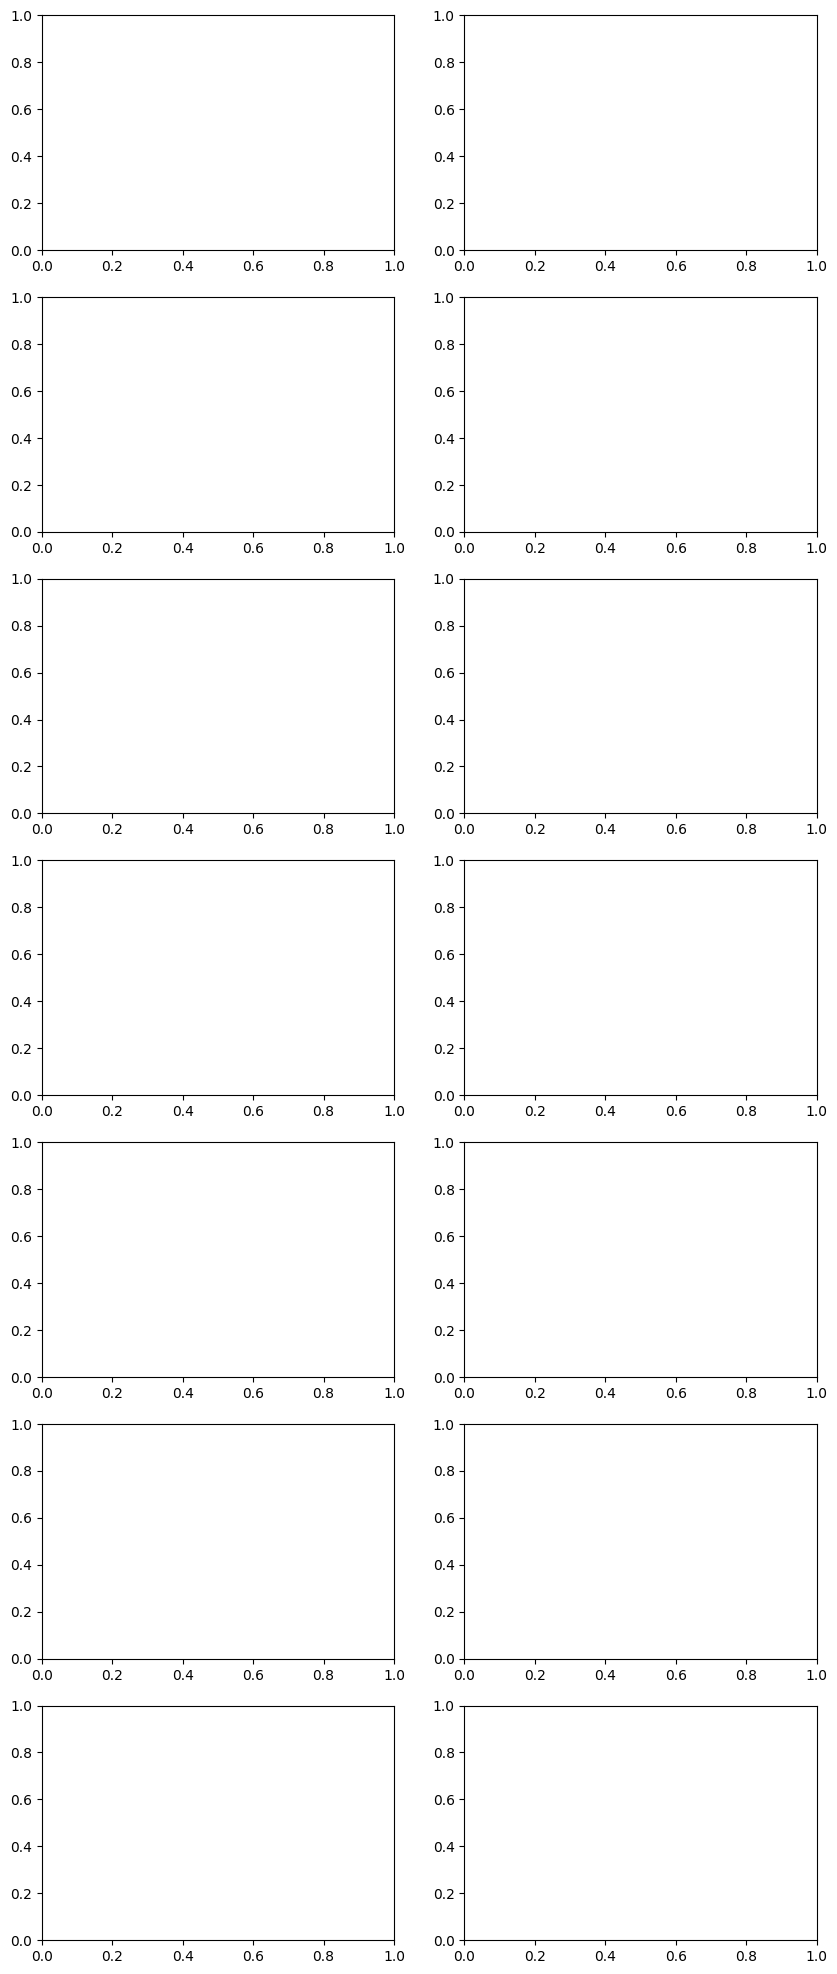

In [166]:
columns = ['Flight Distance', 'Inflight wifi service']

fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], columns]
    cluster_counts = cross_counts.loc[[cluster], columns]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Columns')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Columns')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Columns')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Columns')

plt.tight_layout()
plt.show()


In [167]:
Eco_enc_df['Flight Distance']

0        1180
1        1276
2        1061
3        1182
4         834
         ... 
46588    1055
46589     867
46590    1620
46591     192
46592    1000
Name: Flight Distance, Length: 46593, dtype: int64

#### 年齢別

In [151]:
#年齢別
Eco_enc_df['decade'] =Eco_enc_df['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')

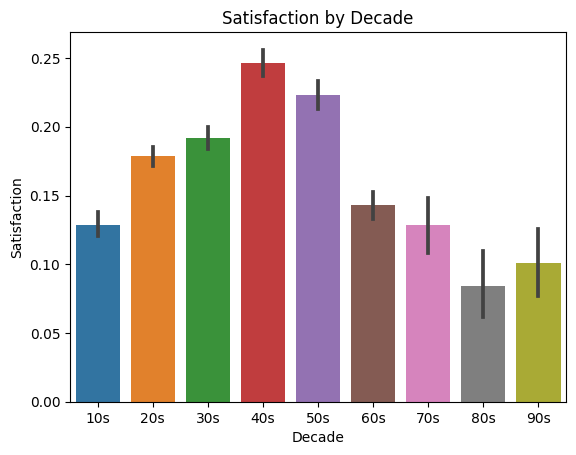

In [153]:
sns.barplot(x='decade', y='satisfaction_satisfied', data=Eco_enc_df.sort_values('decade'))
plt.title('Satisfaction by Decade')
plt.xlabel('Decade')
plt.ylabel('Satisfaction')
plt.show()

satisfaction_satisfied,0,1
decade,,
10s,0.871400,0.128600
20s,0.821297,0.178703
30s,0.808239,0.191761
40s,0.753503,0.246497
50s,0.777104,0.222896
60s,0.857230,0.142770
70s,0.871324,0.128676
80s,0.915464,0.084536
90s,0.898785,0.101215


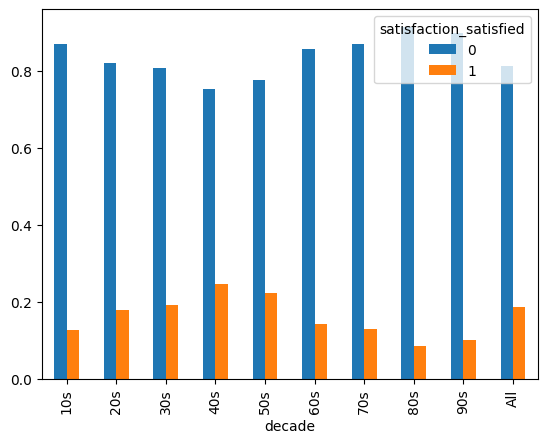

In [154]:
#年齢別満足かどうか
cross = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()



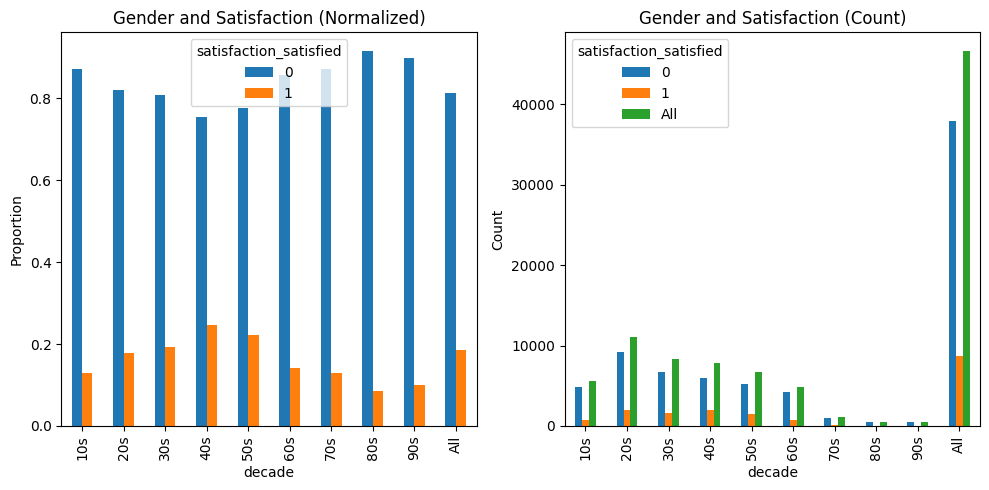

In [155]:
# 年代別のグラフ
cross = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('decade')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


satisfaction_satisfied,0,1
Gender_Male,,
0,0.816327,0.183673
1,0.811369,0.188631
All,0.813899,0.186101


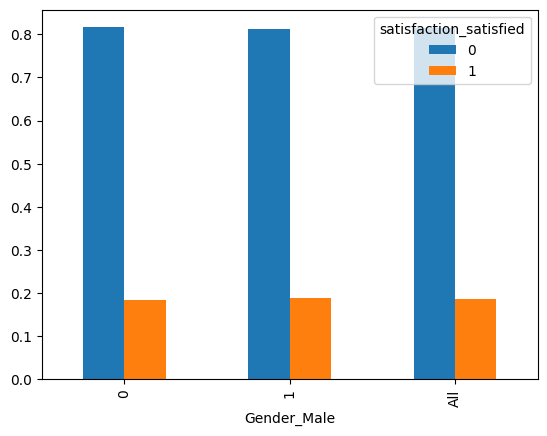

In [65]:
#Gender別
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

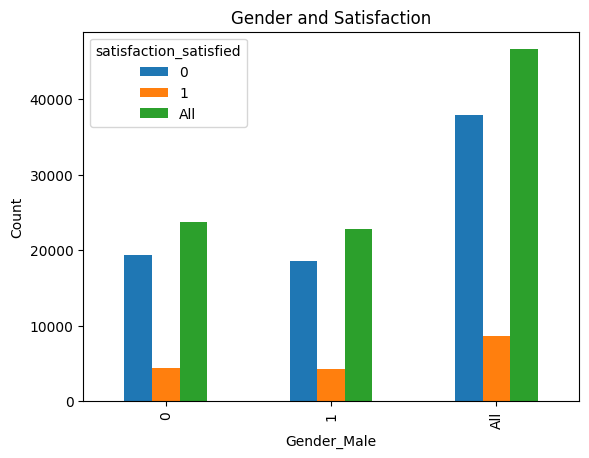

In [66]:
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross.plot(kind="bar")
plt.ylabel('Count')
plt.title('Gender and Satisfaction')
plt.show()

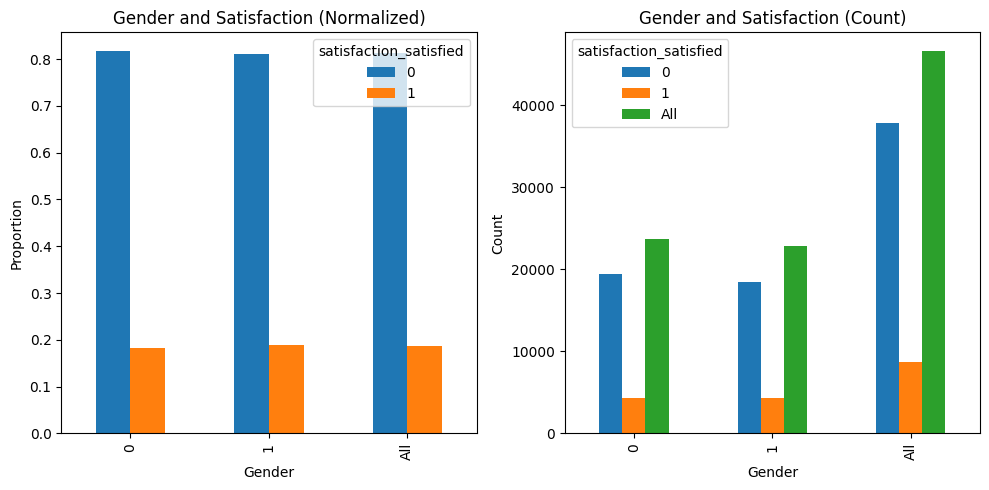

In [156]:
# Gender別のグラフ
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [123]:
Eco_enc_df.sort_values('Flight Distance', inplace=True)

#### Flight Distanceを２つに分けてみる

In [204]:
long_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] > 1300]
short_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] <= 1300]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


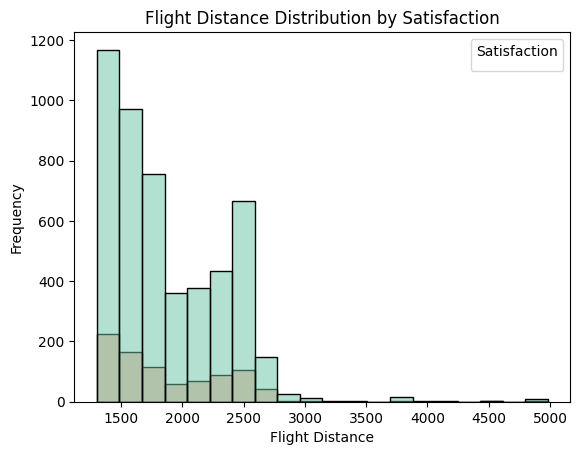

In [205]:
sns.histplot(data=long_Eco_enc_df, x='Flight Distance', bins=20, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

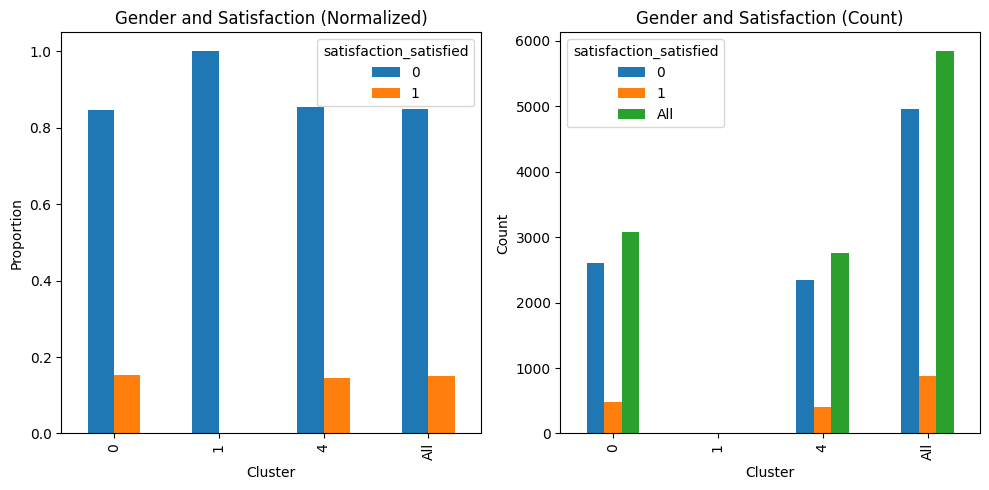

In [210]:
# クラスターごとの分布
cross = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


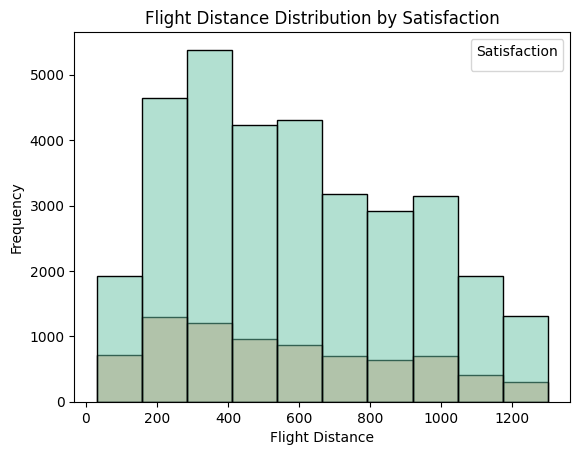

In [209]:
sns.histplot(data=short_Eco_enc_df, x='Flight Distance', bins=10, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

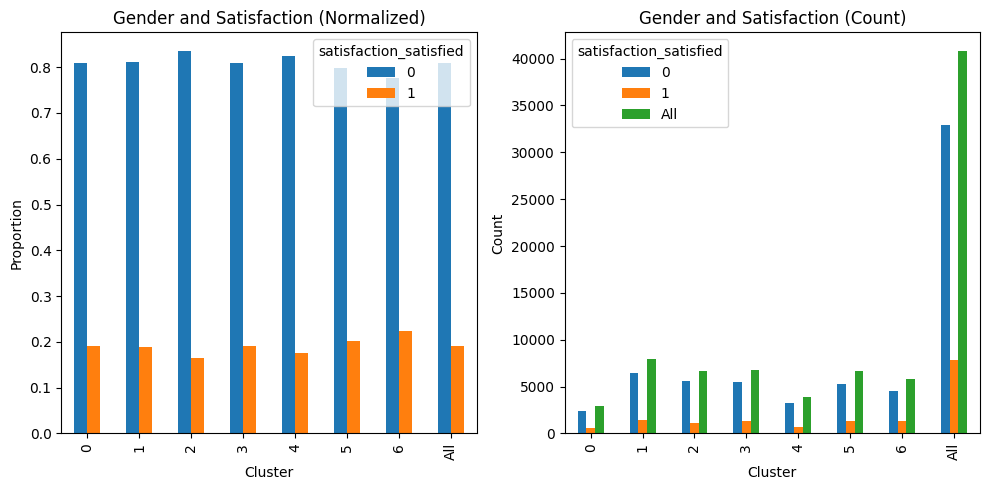

In [211]:
# クラスターごとの分布
cross = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [ ]:
標準化してクラスタリングと次元削減